### Extract a municipalities road network from the Nationaal WegenBestand
Only run this notebook if a new road network needs to be generated

To run, download the nationaal wegenbestand from:  
https://downloads.rijkswaterstaatdata.nl/nwb-wegen/geogegevens/shapefile/Nederland_totaal/  
and the latest version of the 'Wijk- en Buurtkaart' from:  
https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data. 
 
Replace the paths to the filespath in the notebooks with the path to the corresponding file on your local machine. As both files are large they should not be added to this repository.

In [1]:
import os
import shapefile
import geopandas as gpd
from shapely import LineString


#### Obtain the desired municipality polygon

In [2]:
desired_muncipality = 'Delft'

Municipality 'Delft'


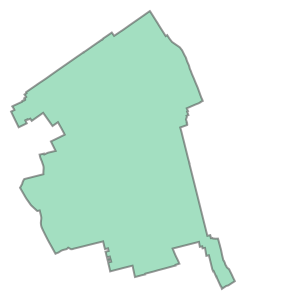

In [3]:
municipalities = gpd.read_file(r"C:\Users\lange\Downloads\wijkbuurtkaart_2023_v1\gemeenten_2023_v1.shp")
municipalities = municipalities[municipalities['H2O'] == 'NEE']
municipality_polygon = municipalities[municipalities['GM_NAAM'] == desired_muncipality]['geometry'].values[0]

print(f"Municipality '{desired_muncipality}'")
municipality_polygon

#### Filter the NWB according to the muncipality polygon

In [4]:
nwb_totaal = shapefile.Reader(r"C:\Users\lange\Downloads\01-12-2023\01-12-2023\Wegvakken\Wegvakken.shp",
                              encoding='latin1')
nwb_municipality = shapefile.Writer(rf"{desired_muncipality}_nwb\{desired_muncipality}.shp",
                                    encoding='latin1')
nwb_municipality.fields = nwb_totaal.fields[1:]

for shaperec in nwb_totaal.iterShapeRecords(bbox=municipality_polygon.bounds):
    record = shaperec.record
    shape = shaperec.shape
    line = LineString(shape.points)
    if line.intersects(municipality_polygon) and record[8] != 'FP':
        nwb_municipality.record(*record)
        nwb_municipality.shape(shape)

print(f"Original NWB Size: {len(nwb_totaal):_} sections")
print(f"NWB size for muncipality {desired_muncipality}: {len(nwb_municipality):_} sections")
nwb_totaal.close()
nwb_municipality.close()

## Add projection file
projection = "PROJCS['RD_New',GEOGCS['GCS_Amersfoort',DATUM['D_Amersfoort',SPHEROID['Bessel_1841',6377397.155,299.1528128]],\
PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Double_Stereographic'],PARAMETER['False_Easting',155000.0],\
PARAMETER['False_Northing',463000.0],PARAMETER['Central_Meridian',5.38763888888889],PARAMETER['Scale_Factor',0.9999079],\
PARAMETER['Latitude_Of_Origin',52.1561605555556],UNIT['Meter',1.0]]"
proj_file = open(rf"{desired_muncipality}_nwb\{desired_muncipality}.prj", 'w')
proj_file.write(projection)
proj_file.close()


Original NWB Size: 1_527_149 sections
NWB size for muncipality Delft: 5_035 sections


#### Save all buurt polygons

In [5]:
buurten = gpd.read_file(r"C:\Users\lange\Downloads\wijkbuurtkaart_2023_v1\buurten_2023_v1.shp",
                        encoding='latin1')
buurten_municipality = buurten[buurten['GM_NAAM'] == desired_muncipality]

<Axes: >

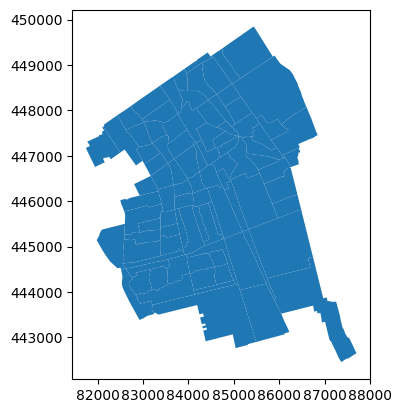

In [6]:
newpath = rf'{desired_muncipality}_buurten' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
buurten_municipality.to_file(f"{desired_muncipality}_buurten\{desired_muncipality}_buurten.shp")
buurten_municipality.plot()

#### Save all wijk polygons

In [8]:
wijken = gpd.read_file(r"C:\Users\lange\Downloads\wijkbuurtkaart_2023_v1\wijken_2023_v1.shp",
                       encoding='latin1')
wijken_municipality = wijken[wijken['GM_NAAM'] == desired_muncipality]

<Axes: >

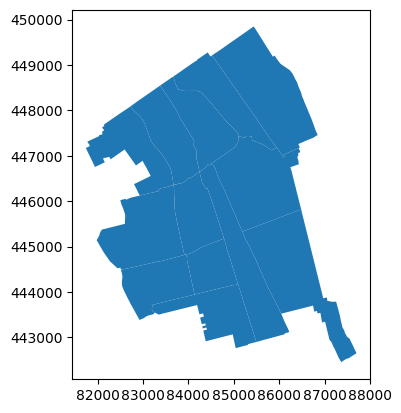

In [9]:
newpath = rf'{desired_muncipality}_wijken' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
wijken_municipality.to_file(f"{desired_muncipality}_wijken\{desired_muncipality}_wijken.shp")
wijken_municipality.plot()